In [7]:
import pandas as pd
import matplotlib.pyplot as plt
traffic = pd.read_csv("traffic_count.csv")
print(traffic)
car_counts = traffic.groupby("neighborhood").mean()['average_daily_car_traffic']

      _id          id  device_id    record_oid count_start_date  \
0       1  1011743669         85  1.445865e+09       2019-04-18   
1       2  1026101993        140  1.121444e+09       2019-01-24   
2       3  1032382575         11  1.539893e+09       2018-08-28   
3       4   103627606          9  7.341951e+08       2018-07-17   
4       5  1039546167        144           NaN              NaN   
..    ...         ...        ...           ...              ...   
415  1393  1132416719        434           NaN              NaN   
416  1394  1037219067        435           NaN              NaN   
417  1420  1329604877        436  1.001259e+09       2021-07-21   
418  1421   704127706        437  1.832664e+09       2021-07-21   
419  1422  1814538648        438  1.741899e+09       2021-07-21   

    count_end_date  average_daily_car_traffic  average_daily_bike_traffic  \
0       2019-04-26                     4949.0                         NaN   
1              NaN                       

Add the generic bar graph

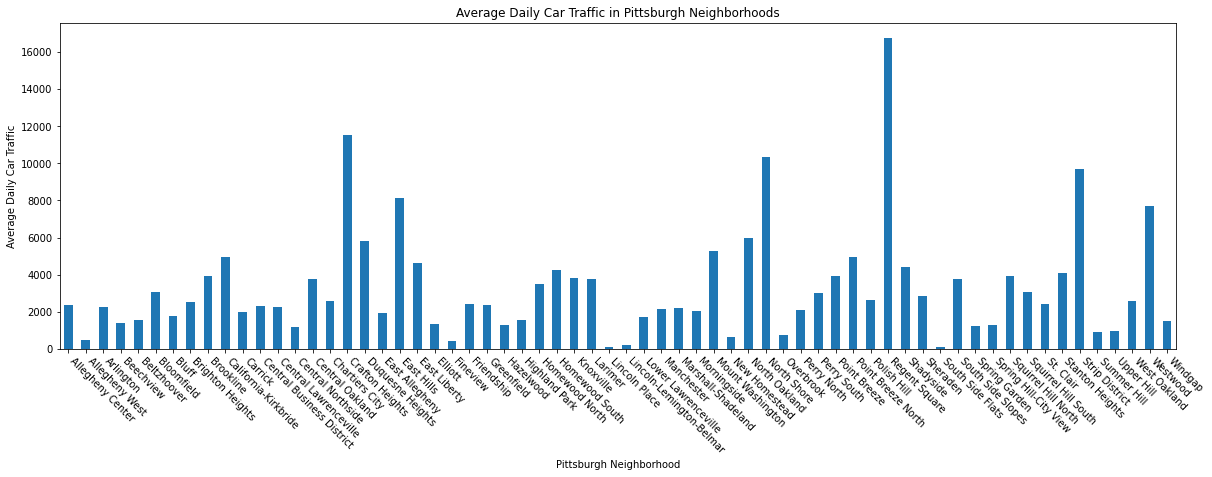

In [3]:
#pd.Series([1,5,2,5], index=traffic).plot.bar()
car_counts_clean = car_counts.dropna(axis=0)
plt.figure(figsize=(20,6))
car_counts_clean.plot.bar(rot=-45)
plt.xticks(range(0,len(car_counts_clean),1),ha='left',fontsize=10)
plt.xlabel("Pittsburgh Neighborhood")
plt.ylabel("Average Daily Car Traffic")
plt.title("Average Daily Car Traffic in Pittsburgh Neighborhoods")
plt.show()

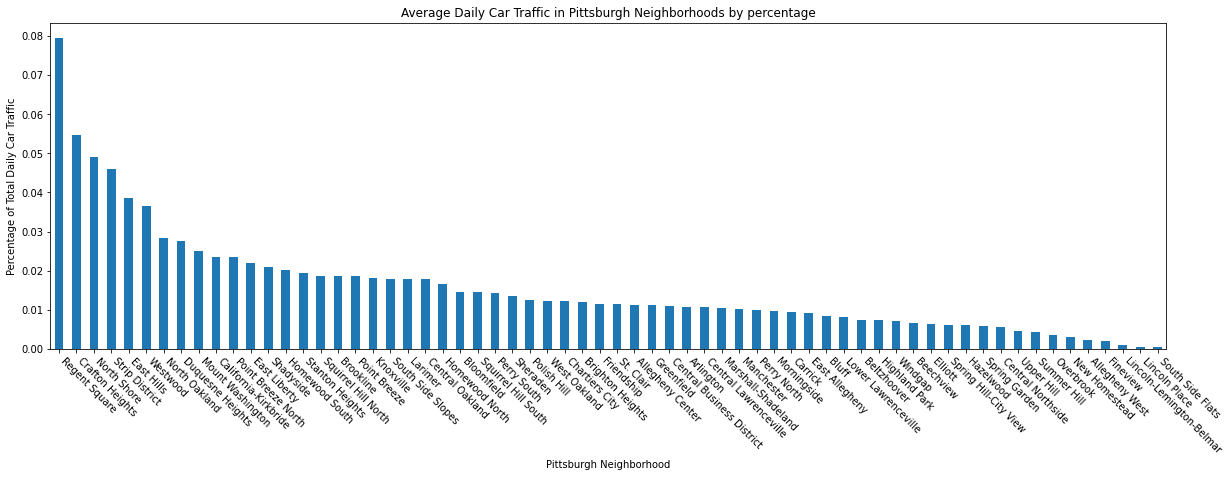

In [12]:
car_percent = car_counts_clean/car_counts_clean.sum()
plt.figure(figsize=(20,6))
car_percent.sort_values(ascending=False).plot.bar(rot=-45)
plt.xticks(range(0,len(car_counts_clean),1),ha='left',fontsize=10)
plt.xlabel("Pittsburgh Neighborhood")
plt.ylabel("Percentage of Total Daily Car Traffic")
plt.title("Average Daily Car Traffic in Pittsburgh Neighborhoods by percentage")
plt.show()

Use geopandas to show traffic across pittsburgh

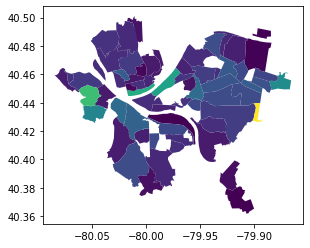

In [26]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

traffic_map = neighborhoods.merge(car_counts, how='left', left_on='hood', right_on='neighborhood')
#traffic_map[['hood','average_daily_car_traffic']].head()
traffic_map.plot(column='average_daily_car_traffic')